<img src="img/python-logo-notext.svg"
     style="display:block;margin:auto;width:10%"/>
<h1 style="text-align:center;">Python: Zeitreihen 1</h1>
<h2 style="text-align:center;">Coding Akademie München GmbH</h2>
<br/>
<div style="text-align:center;">Dr. Matthias Hölzl</div>
<div style="text-align:center;">Allaithy Raed</div>

# Zeitreihen

## NumPy Datetime

Die Standardbibliothek von Python hat einen Datentyp `datetime.datetime`. NumPy bietet einen effizienteren und leistungsfähigeren Typ `datetime64` an.

In [1]:
import numpy as np

In [2]:
course_dates = np.array(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64')

In [5]:
course_dates

array(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[D]')

`datetime64[D]` bedeutet `datetime64` mit Einheit "Tag". Andere Möglichkeiten wären Woche, Monat oder Jahr.

In [11]:
course_weeks = np.array(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[W]')
course_weeks

array(['2020-03-05', '2020-03-12', '2020-03-12'], dtype='datetime64[W]')

In [12]:
course_months = np.array(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[M]')
course_months

array(['2020-03', '2020-03', '2020-03'], dtype='datetime64[M]')

In [14]:
course_dates_by_range = np.arange('2020-03-11', '2020-03-14', dtype='datetime64[D]')
course_dates_by_range

array(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[D]')

## Pandas DateTime Index

In [19]:
import pandas as pd

In [20]:
pd.date_range('2020-03-11', periods=3, freq='D')

DatetimeIndex(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[ns]', freq='D')

In [21]:
pd.to_datetime(['2020-03-11', '2020-03-12', '2020-03-13'])

DatetimeIndex(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[ns]', freq=None)

In [27]:
pd.to_datetime(["11.3.2020", "12. 3. 2020", "13/3/2020", None])

DatetimeIndex(['2020-11-03', '2020-12-03', '2020-03-13', 'NaT'], dtype='datetime64[ns]', freq=None)

## Data Frames mit DateTime Index

In [29]:
data = np.random.randn(3, 4)
index = pd.to_datetime(['2020-03-11', '2020-03-12', '2020-03-13'])
column_names = ['Foo', 'Bar', 'Baz', 'Quux']
df = pd.DataFrame(data, index, column_names)
df

Foo       Bar       Baz      Quux
2020-03-11  0.441644  0.168996 -1.580936  1.837209
2020-03-12  0.026861  0.130198 -0.149627  0.560644
2020-03-13 -0.359049  1.037003 -0.241721  0.269795

In [30]:
df.index

DatetimeIndex(['2020-03-11', '2020-03-12', '2020-03-13'], dtype='datetime64[ns]', freq=None)

In [35]:
df.index.min(), df.index.argmin()

(Timestamp('2020-03-11 00:00:00'), 0)

In [36]:
df.index.max(), df.index.argmax()

(Timestamp('2020-03-13 00:00:00'), 2)

In [37]:
df.index.is_monotonic_increasing

True

## Resampling

In [38]:
df = pd.read_csv('starbucks.csv', index_col='Date', parse_dates=True)

In [41]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

Resampling verwendet einen `rule` Parameter um zu bestimmen wie die Werte zusammengefasst werden. Beispiele dafür sind:

| Parameter | Bedeutung
|:---------:|-----------|
| A, Y      | Jahresende
| BA, BY    | Ende des Geschäftsjahres
| D         | Tag
| B         | Geschäftstag
| W         | Wöchentlich

In [42]:
df.resample(rule='A').mean()

Close        Volume
Date                               
2015-12-31  50.078100  8.649190e+06
2016-12-31  53.891732  9.300633e+06
2017-12-31  55.457310  9.296078e+06
2018-12-31  56.870005  1.122883e+07

In [51]:
df.resample(rule='A').apply(lambda dates: dates[-1] if len(dates) else None)

Close   Volume
Date                        
2015-12-31  56.7513  4960875
2016-12-31  53.2731  8344508
2017-12-31  56.1288  5365646
2018-12-31  64.4000  7690183

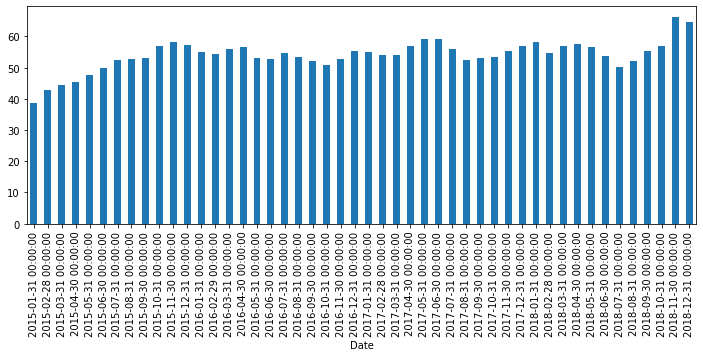

In [94]:
df['Close'].resample('M').mean().plot.bar(figsize=(12,4));

## Zeitverschiebung

In [62]:
df_shifted = df.copy()
df_shifted['Close Shifted'] = df['Close'].shift(1)
df_shifted['Volume Shifted'] = df['Volume'].shift(1)
df_shifted

Close    Volume  Close Shifted  Volume Shifted
Date                                                        
2015-01-02  38.0061   6906098            NaN             NaN
2015-01-05  37.2781  11623796        38.0061       6906098.0
2015-01-06  36.9748   7664340        37.2781      11623796.0
2015-01-07  37.8848   9732554        36.9748       7664340.0
2015-01-08  38.4961  13170548        37.8848       9732554.0
...             ...       ...            ...             ...
2018-12-24  60.5600   6323252        61.3900      23524888.0
2018-12-26  63.0800  16646238        60.5600       6323252.0
2018-12-27  63.2000  11308081        63.0800      16646238.0
2018-12-28  63.3900   7712127        63.2000      11308081.0
2018-12-31  64.4000   7690183        63.3900       7712127.0

[1006 rows x 4 columns]

In [63]:
df.shift(1)

Close      Volume
Date                           
2015-01-02      NaN         NaN
2015-01-05  38.0061   6906098.0
2015-01-06  37.2781  11623796.0
2015-01-07  36.9748   7664340.0
2015-01-08  37.8848   9732554.0
...             ...         ...
2018-12-24  61.3900  23524888.0
2018-12-26  60.5600   6323252.0
2018-12-27  63.0800  16646238.0
2018-12-28  63.2000  11308081.0
2018-12-31  63.3900   7712127.0

[1006 rows x 2 columns]

In [64]:
df.shift(-1)

Close      Volume
Date                           
2015-01-02  37.2781  11623796.0
2015-01-05  36.9748   7664340.0
2015-01-06  37.8848   9732554.0
2015-01-07  38.4961  13170548.0
2015-01-08  37.2361  27556706.0
...             ...         ...
2018-12-24  63.0800  16646238.0
2018-12-26  63.2000  11308081.0
2018-12-27  63.3900   7712127.0
2018-12-28  64.4000   7690183.0
2018-12-31      NaN         NaN

[1006 rows x 2 columns]

In [67]:
df.shift(periods=1, freq='M')

Close    Volume
Date                         
2015-01-31  38.0061   6906098
2015-01-31  37.2781  11623796
2015-01-31  36.9748   7664340
2015-01-31  37.8848   9732554
2015-01-31  38.4961  13170548
...             ...       ...
2018-12-31  60.5600   6323252
2018-12-31  63.0800  16646238
2018-12-31  63.2000  11308081
2018-12-31  63.3900   7712127
2019-01-31  64.4000   7690183

[1006 rows x 2 columns]

## Rolling und Expanding

In [76]:
df['Close 30-day rolling mean'] = df['Close'].rolling(window=30).mean().shift(-15)

In [80]:
df[['Close', 'Close 30-day rolling mean']].plot(figsize=(12, 8), lw=3);

Mittelwerte vom Beginn der Zeitreihe:

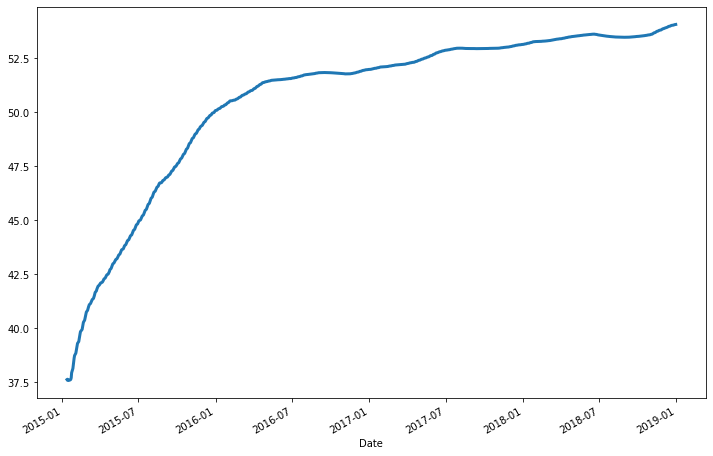

In [82]:
df['Close'].expanding(min_periods=7).mean().plot(figsize=(12, 8), lw=3)